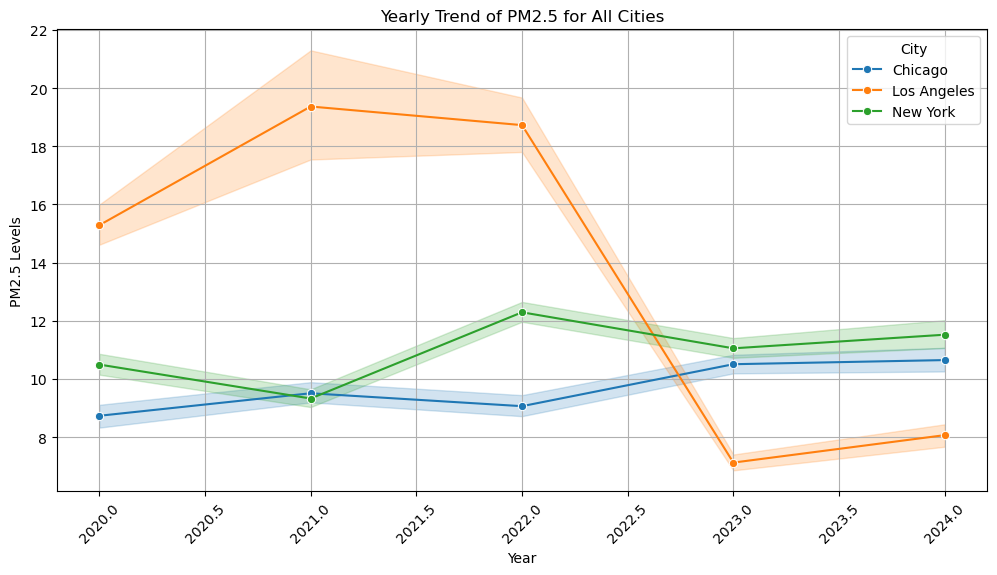

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/Users/shrutikute/Downloads/updated_air_quality_dataset.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Fix column names to remove whitespace
df.columns = df.columns.str.replace(" ", "_")

# Convert Date column to datetime if present
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
    df["Year"] = df["Date"].dt.year  # Extract Year

# Map County_Name to City names
county_to_city = {
    "Cook": "Chicago",
    "Los Angeles": "Los Angeles",
    "New York": "New York"
}
df["City"] = df["County_Name"].map(county_to_city)

# Drop missing values for PM2.5
df = df.dropna(subset=["PM2.5"])

# Plot yearly trend for PM2.5 for all cities in one graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="PM2.5", hue="City", marker="o")

# Customize plot
plt.title("Yearly Trend of PM2.5 for All Cities")
plt.xlabel("Year")
plt.ylabel("PM2.5 Levels")
plt.xticks(rotation=45)
plt.legend(title="City")
plt.grid(True)

# Show the plot
plt.show()


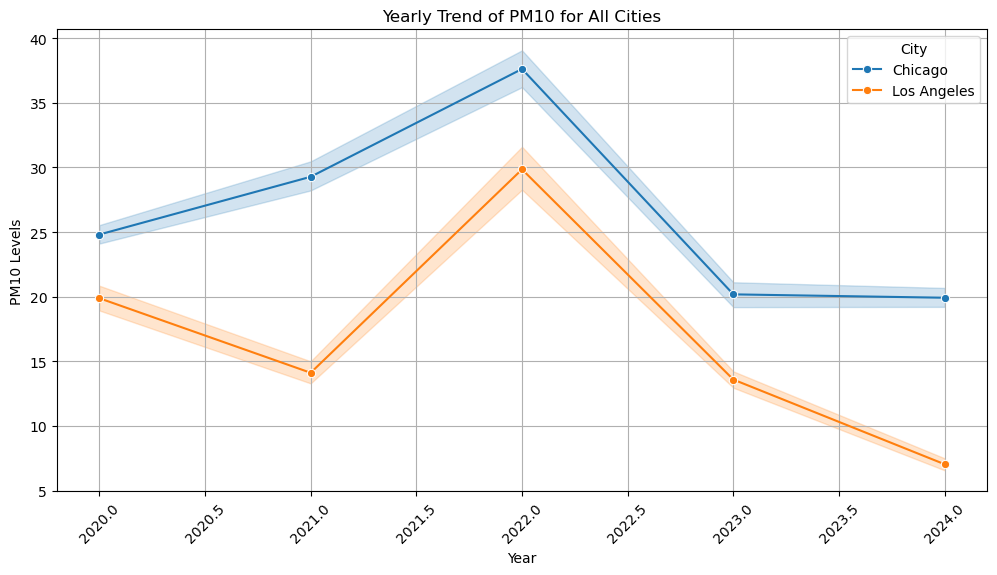

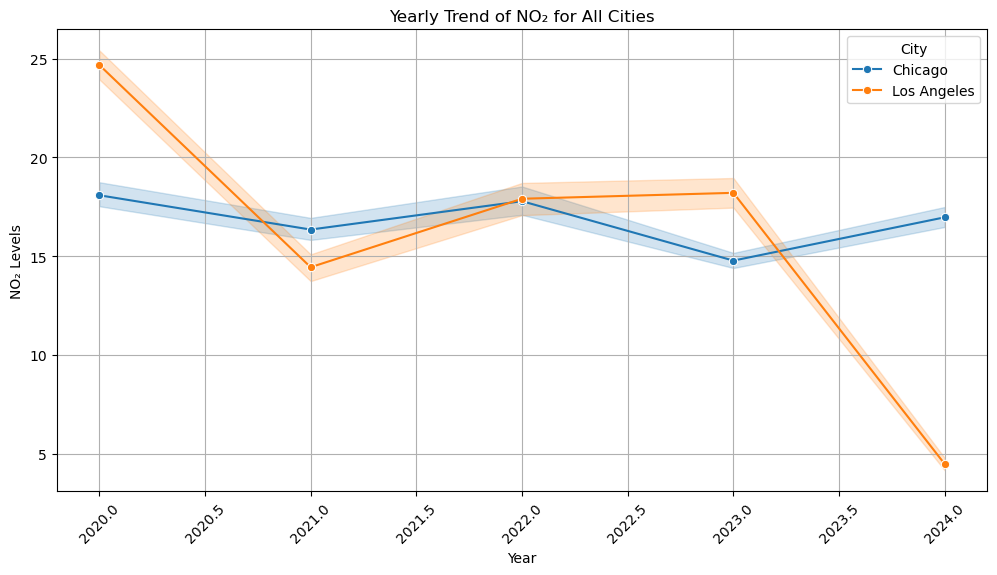

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/Users/shrutikute/Downloads/updated_air_quality_dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Fix column names to remove whitespace
df.columns = df.columns.str.replace(" ", "_")

# Convert Date column to datetime if present
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
    df["Year"] = df["Date"].dt.year  # Extract Year

# Map County_Name to City names
county_to_city = {
    "Cook": "Chicago",
    "Los Angeles": "Los Angeles",
    "New York": "New York"
}
df["City"] = df["County_Name"].map(county_to_city)

# Drop missing values for PM10 and NO2
df = df.dropna(subset=["PM10", "NO2"])

# 📌 Plot yearly trend for PM10
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="PM10", hue="City", marker="o")
plt.title("Yearly Trend of PM10 for All Cities")
plt.xlabel("Year")
plt.ylabel("PM10 Levels")
plt.xticks(rotation=45)
plt.legend(title="City")
plt.grid(True)
plt.show()

# 📌 Plot yearly trend for NO2
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="NO2", hue="City", marker="o")
plt.title("Yearly Trend of NO₂ for All Cities")
plt.xlabel("Year")
plt.ylabel("NO₂ Levels")
plt.xticks(rotation=45)
plt.legend(title="City")
plt.grid(True)
plt.show()


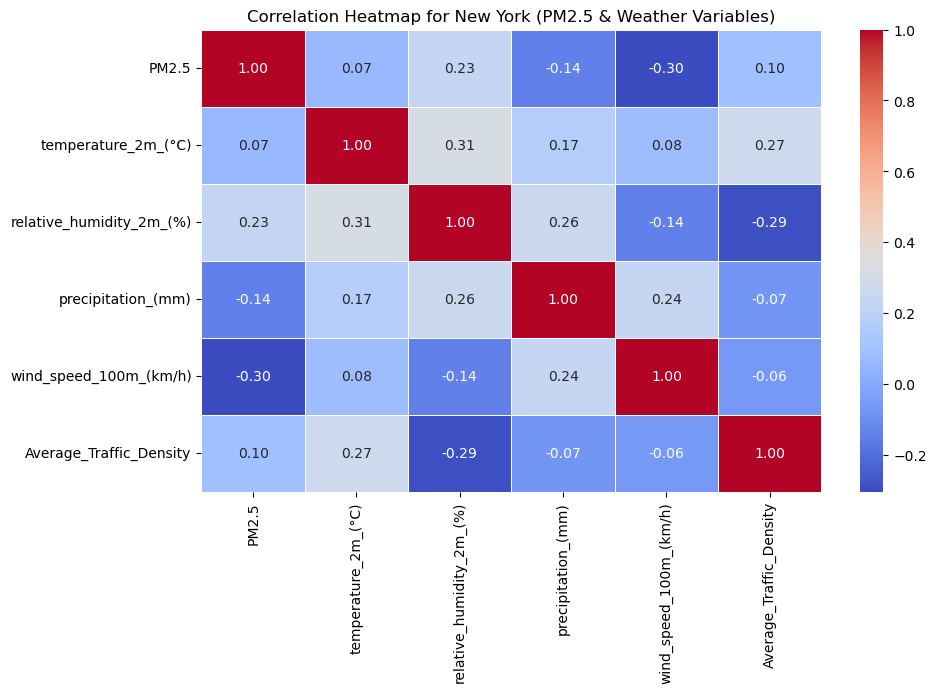

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/Users/shrutikute/Downloads/updated_air_quality_dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Fix column names to remove whitespace
df.columns = df.columns.str.replace(" ", "_")

# Map County_Name to City names
county_to_city = {
    "Cook": "Chicago",
    "Los Angeles": "Los Angeles",
    "New York": "New York"
}
df["City"] = df["County_Name"].map(county_to_city)

# Define the selected columns for New York's heatmap (using PM2.5)
selected_columns_ny = ["PM2.5", "temperature_2m_(°C)", "relative_humidity_2m_(%)", 
                       "precipitation_(mm)", "wind_speed_100m_(km/h)", "Average_Traffic_Density"]

# Extract data for New York with selected columns
df_ny_selected = df[df["City"] == "New York"][selected_columns_ny].dropna()

# Check if there is enough data to generate the heatmap
if df_ny_selected.empty:
    print("No sufficient data available for New York to generate a heatmap with the selected variables.")
else:
    # Generate correlation heatmap for New York with selected columns
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_ny_selected.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Heatmap for New York (PM2.5 & Weather Variables)")
    plt.show()


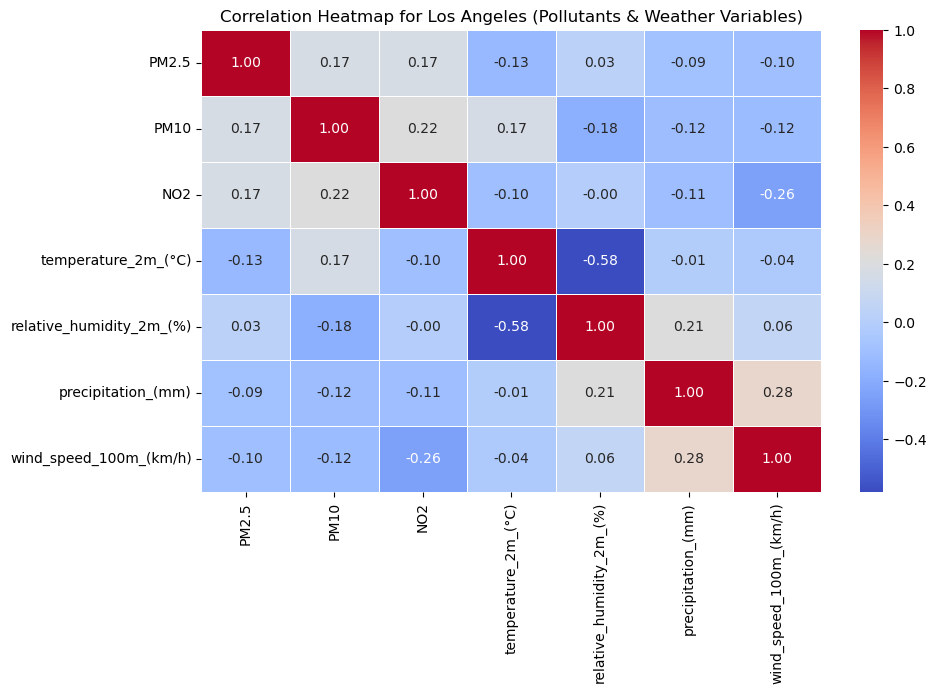

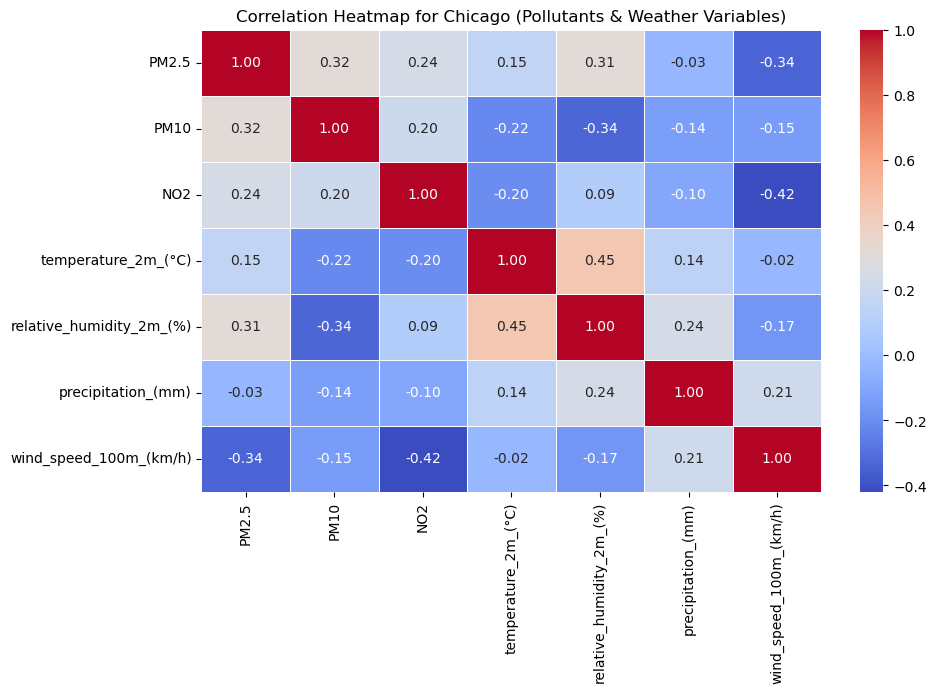

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/Users/shrutikute/Downloads/updated_air_quality_dataset.csv"  
df = pd.read_csv(file_path)

# Fix column names to remove whitespace
df.columns = df.columns.str.replace(" ", "_")

# Map County_Name to City names (Cook = Chicago, Los Angeles = Los Angeles)
df["City"] = df["County_Name"].map({"Cook": "Chicago", "Los Angeles": "Los Angeles"})

# Define the selected columns for heatmap (Pollutants & Weather Variables)
selected_columns = ["PM2.5", "PM10", "NO2", "temperature_2m_(°C)", 
                    "relative_humidity_2m_(%)", "precipitation_(mm)", "wind_speed_100m_(km/h)"]

# Generate correlation heatmap for Los Angeles and Chicago
cities_to_plot = ["Los Angeles", "Chicago"]

for city in cities_to_plot:
    plt.figure(figsize=(10, 6))
    city_data = df[df["City"] == city][selected_columns].dropna()
    
    if city_data.empty:
        print(f"No sufficient data available for {city} to generate a heatmap.")
    else:
        corr_matrix = city_data.corr()
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
        plt.title(f"Correlation Heatmap for {city} (Pollutants & Weather Variables)")
        plt.show()
